In [2]:
from maap.maap import MAAP
maap = MAAP()

import ipycmc
w = ipycmc.MapCMC()

In [3]:
#load some other functions from maap.maap import MAAP
import ipycmc
import sys
import maap
import json
import sys
import shutil
import requests
import os
from os import system
maap = MAAP()

In [4]:
#Step 2 - pull some data over area of interest
#First, run function to return a list of granules toward batch processing
def get_granules_list(granules):
    url_list = []
    output_list = []
    for res in granules:
        url_list.append(res.getDownloadUrl())

    for url in url_list:
        if url[0:5] == 's3://':
            url = url[5:].split('/')
            url[0] += '.s3.amazonaws.com'
            url = 'https://' + '/'.join(url)
        print(url)
        output_list.append(url)
    return output_list

In [5]:
#Step 2 cont.
#function to download a list of granules locally
def download_granules(granules, output_dir):
    url_list = []
    for res in granules:
        url_list.append(res.getDownloadUrl())

    for url in url_list:
        if url[0:5] == 's3://':
            url = url[5:].split('/')
            url[0] += '.s3.amazonaws.com'
            url = 'https://' + '/'.join(url)
        print(url)
        name = output_dir + url.split('/')[-1]
        print(name)
        r = requests.get(url, allow_redirects=True)
        open(name, 'wb').write(r.content)

In [6]:
# Step 2 cont.
#download the files of interest to local workspace

#atl03_granules=maap.searchGranule(collection_concept_id="C1200166513-NASA_MAAP", bounding_box="-127.0,50.0,-60.0,52.0", limit=1000000)
#atl08_granules=maap.searchGranule(collection_concept_id="C1200235747-NASA_MAAP", bounding_box="-127.0,50.0,-60.0,52.0", limit=1000000)

#atl03_granules=maap.searchGranule(collection_concept_id="C1200166513-NASA_MAAP", bounding_box="-102.7684,43.17366,-97.32037,47.48166")
#atl08_granules=maap.searchGranule(collection_concept_id="C1200235747-NASA_MAAP", bounding_box="-102.7684,43.17366,-97.32037,47.48166")
atl03_granules=maap.searchGranule(collection_concept_id="C1200166513-NASA_MAAP", bounding_box="-180,50,180,75", limit=1000000)
atl08_granules=maap.searchGranule(collection_concept_id="C1200235747-NASA_MAAP", bounding_box="-180,50,180,75", limit=1000000)
print(len(atl03_granules))

atl03_id_list = []
for i in range(0,len(atl03_granules)):
    url = atl03_granules[i]['Granule']['OnlineAccessURLs']['OnlineAccessURL']['URL']
    url = url[5:].split('/')
    url[0] += '.s3.amazonaws.com'
    url = 'https://' + '/'.join(url)
    atl03_id_list.append(url)
    
atl08_id_list = []
for i in range(0,len(atl08_granules)):
    url = atl08_granules[i]['Granule']['OnlineAccessURLs']['OnlineAccessURL']['URL']
    url = url[5:].split('/')
    url[0] += '.s3.amazonaws.com'
    url = 'https://' + '/'.join(url)
    atl08_id_list.append(url)

18480


In [ ]:
#Optional: If we wanted to download granules locally, we can use this function 
count=0
for f in range(0,len(atl03_granules)):
    ID = atl03_granules[f]['Granule']['OnlineAccessURLs']['OnlineAccessURL']['URL']
    ID2 = atl08_granules[f]['Granule']['OnlineAccessURLs']['OnlineAccessURL']['URL']
    #print(ID)
    count=count+1
    download_dir = '/projects/above/testing/30m_testing/'
    existingfiles = [file for file in os.listdir(download_dir)]
    if ID in existingfiles or ID2 in existingfiles:
        print('file exists...')
    else:                        
        atl03_granules[f].getLocalPath(download_dir) 
        atl08_granules[f].getLocalPath(download_dir)    
print(count)

In [7]:
# Find index for matching ATL03 and ATL08 files from list
id03_list = []
for i in range (0,len(atl03_id_list)):
    id03_list.append(atl03_id_list[i].split('/')[-1].split('ATL03_')[1].split('_002')[0])
    
id08_list = []
for i in range (0,len(atl08_id_list)):
    id08_list.append(atl08_id_list[i].split('/')[-1].split('ATL08_')[1].split('_003')[0])

process03 = []
process08 = []
count = 0
no_match_count = 0
for i in range(0,len(id03_list)):
    count = count + 1
    try:
        matching_08_index = id08_list.index(id03_list[i])
        process03.append(i)
        process08.append(matching_08_index)
    except ValueError:
        no_match_count = no_match_count + 1
        #print('No ATL08 match: ' + id03_list[i])
print('Total granules: ' + str(count))
print('Granules without ATL03/ATL08 pair: ' + str(no_match_count))

Total granules: 18480
Granules without ATL03/ATL08 pair: 1626


In [9]:
# Step 7 - run a DPS job!
#first, pick the files you want to run in DPS
#bounding box North America north of 50 degrees lat
#ice2_granules=maap.searchGranule(collection_concept_id="C1200116818-NASA_MAAP", bounding_box="-152.5534776481967,50.0,-50.78405971406124,80.10902122001679", limit=10000)
atl03_id_list[process03[0]]

'https://nasa-maap-data-store.s3.amazonaws.com/file-staging/nasa-map/ATL03___002/ATL03_20181014001049_02350102_002_01.h5'

In [10]:
#Step 7 cont.
#try to submit a MAAP job on a single file
result = maap.submitJob(
    identifier='nothing',
    algo_id='run_rebinning_ubuntu',
    version='master',
    username='r2d2',
    queue='maap-ops-worker-2-16gb',
    input_atl03 = atl03_id_list[process03[0]],
    input_atl08 = atl08_id_list[process08[0]],
    output = '/output')
print(result)

{'status': 'success', 'http_status_code': 200, 'job_id': '23fcbc5e-af1b-41b8-bf09-a8664aad0400'}


In [18]:
#Step 8
#submit many jobs in a loop to process many files
for g in range(3,4):
    submit_result = maap.submitJob(identifier="nothing",
                                   algo_id="run_rebinning_ubuntu",
                                   version="master",
                                   username="r2d2",
                                   queue='maap-ops-worker-2-16gb',
                                   input_atl03=atl03_id_list[process03[g]], 
                                   input_atl08=atl08_id_list[process08[g]],
                                   output = '/output')
    print(submit_result)

{'status': 'success', 'http_status_code': 200, 'job_id': '876f3e95-2e39-4d8b-9279-e3ba3ae059cc'}


In [19]:
#Step 8
#submit many jobs in a loop to process many files
for g in range(4,5):
    submit_result = maap.submitJob(identifier="nothing",
                                   algo_id="run_rebinning_ubuntu",
                                   version="master",
                                   username="r2d2",
                                   queue='maap-ops-worker-2-16gb',
                                   input_atl03=atl03_id_list[process03[g]], 
                                   input_atl08=atl08_id_list[process08[g]],
                                   output = '/output')
    print(submit_result)

{'status': 'success', 'http_status_code': 200, 'job_id': 'c36f4278-3c36-4ed4-b339-e08d52bf95eb'}


In [24]:
#Step 8
#submit many jobs in a loop to process many files
for g in range(5,len(process03)):
    submit_result = maap.submitJob(identifier="nothing",
                                   algo_id="run_rebinning_ubuntu",
                                   version="master",
                                   username="r2d2",
                                   queue='maap-ops-worker-2-16gb',
                                   input_atl03=atl03_id_list[process03[g]], 
                                   input_atl08=atl08_id_list[process08[g]],
                                   output = '/output')
    print(submit_result)

{'status': 'success', 'http_status_code': 200, 'job_id': '35ae63df-df34-483d-95b1-c6968a5554ad'}
{'status': 'success', 'http_status_code': 200, 'job_id': '1f1c8a64-4123-4acd-837c-4d286af32970'}
{'status': 'success', 'http_status_code': 200, 'job_id': 'a128e7e2-f083-4998-913c-3f4ca78f8245'}
{'status': 'success', 'http_status_code': 200, 'job_id': 'dcb29289-7587-4e66-a838-b2752974e0ae'}
{'status': 'success', 'http_status_code': 200, 'job_id': '51725e0d-ef4d-4d7f-8a49-cdce797b0399'}
{'status': 'success', 'http_status_code': 200, 'job_id': 'c04172d6-ad99-4b4b-843e-9d90dddc3e1b'}
{'status': 'success', 'http_status_code': 200, 'job_id': 'be51fffd-b128-4799-b847-cc01c562ebac'}
{'status': 'success', 'http_status_code': 200, 'job_id': '0ad9d4ff-c232-4026-9d52-2a1f4b68a58c'}
{'status': 'success', 'http_status_code': 200, 'job_id': '893e830d-6fc1-4c0b-b359-40228b4fac36'}
{'status': 'success', 'http_status_code': 200, 'job_id': 'cc16aa57-bd99-4b96-b618-f9bde9e82f2b'}
{'status': 'success', 'http_st

In [ ]:
#Step 9: analyze results
#move all output csv files from super nested dps_output folder to a folder of interest
import os, glob
import shutil
output_dir = "/projects/r2d2/icesat2_batch_demo/csv_out"
base_dir = "/projects/r2d2/dps_output/run_icesat2_gabon_ubuntu"
for file in glob.glob("/projects/r2d2/dps_output/run_icesat2_gabon_ubuntu/master/2020/05/12/**/*.csv", recursive=True):
    print(file)
    shutil.copyfile(file, os.path.join(output_dir, os.path.basename(file)))

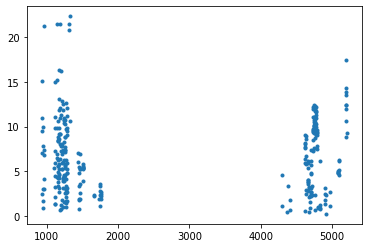

In [23]:
#Step 10: View output, ensure no errors
import h5py
import numpy as np
#atl08 = '/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/03/12/00/47/51/417181/ATL08_30m_20181014221052_02490102_003_01.h5'
atl08 = '/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/05/06/03/23/26/393023/ATL08_30m_20190311014429_11090206_003_01.h5'
atl08 = '/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/06/16/17/53/30/933278/ATL08_30m_20181014001049_02350102_003_01.h5'
atl08 = '/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/06/16/20/55/34/894322/ATL08_30m_20181014014507_02360102_003_01.h5'
f = h5py.File(atl08,'r')
#x = np.asarray(f['gt1l/land_segments/30m_segment/msw_flag'])
#x = np.asarray(f['gt1l/land_segments/30m_segment/latitude'])
x = np.asarray(f['gt1r/land_segments/30m_segment/gedi_rh_100'])
#x = np.asarray(f['gt1r/land_segments/30m_segment/atl03_ground_median'])
#x = np.asarray(f['gt1l/land_segments/30m_segment/bin_id'])
#x = np.asarray(f['gt1l/land_segments/30m_segment/atl03_n_ground'])
#x = np.asarray(f['gt1l/land_segments/canopy/h_canopy'])
import matplotlib.pyplot as plt
plt.plot(x,'.')

